# 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기
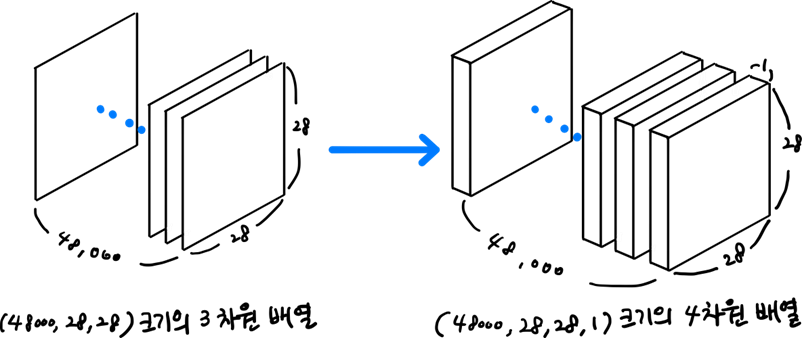

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1,28,28,1)/255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기
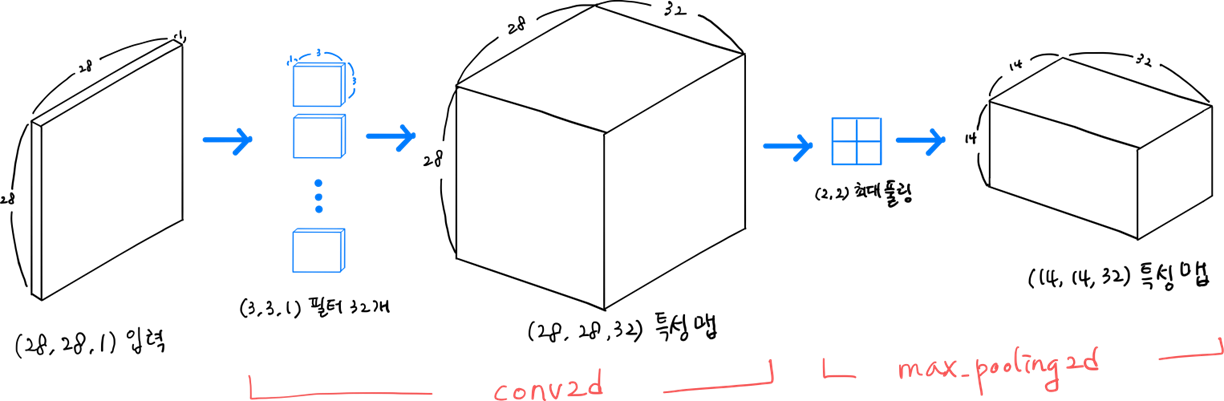

In [2]:
model = keras.Sequential()

### 첫번째 합성곱 - 풀링 층 추가

In [3]:
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu',
                              padding='same',
                              input_shape=(28,28,1)))

# 가장 첫번째 층 이므로 input_shape을 설정
model.add(keras.layers.MaxPooling2D(2))

### 두번째 합성곱 - 풀링 층 추가

In [4]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',
                              padding='same'))

# 가장 첫번째 층 이므로 input_shape을 설정
model.add(keras.layers.MaxPooling2D(2))

### 세번째 : 3차원 특성맵을 일렬로 펼침
    - 마지막에 10개의 뉴런을 가진 출력(밀집)층에서 확률을 계산해야 하기 때문에 일렬로 펼쳐야 한다
### 네번째 : 은닉층 추가 - Dorpout(과대적합 방지)
### 다섯번째 : 최종 출력층 추가

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [7]:
3*3*1*32+32

320

In [8]:
3*3*32*64+64

18496

- 합성곱 층과 풀링층 효과가 잘 나타나 있음
    - 첫번째 합성곱 층을 통과하면 
        - 특성 맵의 깊이는 32가 됨
    - 두번째 합성곱에서 맾의 깊이는 64로 늘어남
    - but, 특성맵의 가로 세로 크기는 첫번재 풀링층에서 절반으로 줄어들고 두번째 풀링층에서 절반으로 줄어들어 (7,7,64)가 됨
- 파라미터 개수
    - 첫번째 합성곱 층
        - 32개의 필터, 크기가 (3,3), 깊이가 1, 필터마다 절편 이므로 9 X 9 X 1 X 32 + 32 =320
    - 두번째 합성곱 층
        - 64개의 필터, 크기가 (3,3), 깊이가 32, 필터마다 절편 => 9 x 9 x 64 X 62 + 64 = 18,496
- flattern 층에서 (7,7,64)를 1차원으로 펼치면 (3136,)zmrldml qodufdl ehla
    - 이를 100개의 뉴런에 연결해야 하므로 은닉층의 모델 파라미터 개수는 3,316 X 100 + 100 = 313,700임

- 모델 구성을 그림으로 출력해주는 plot_model()

In [9]:
# %pip install pydot

### graphviz 설치
- https://graphviz.org/download/ 시스템에 맞게 다운로드
    - 설치시 주의사항
    - path 추가할 것
    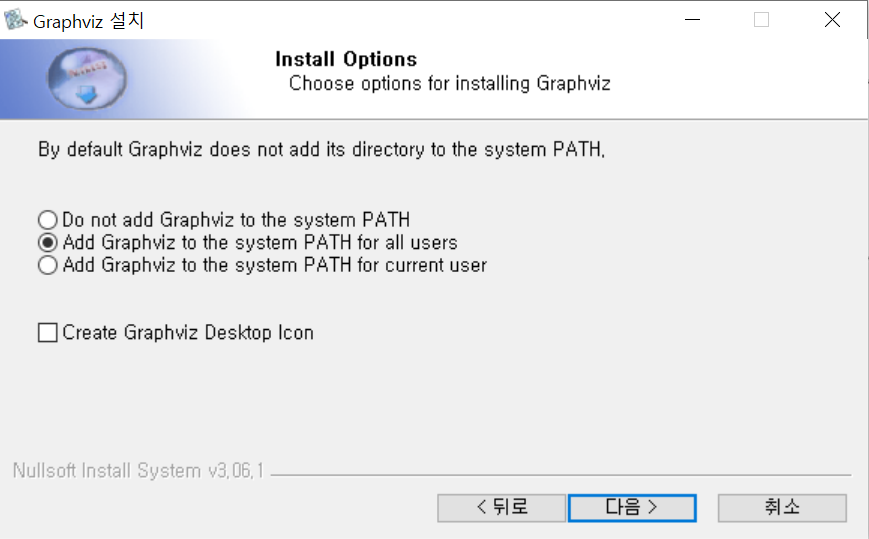
    - conda install graphviz

In [10]:
!pip install graphviz

**노트북 서버 종료 후 재실행**
- aws는 ps 종료

In [11]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


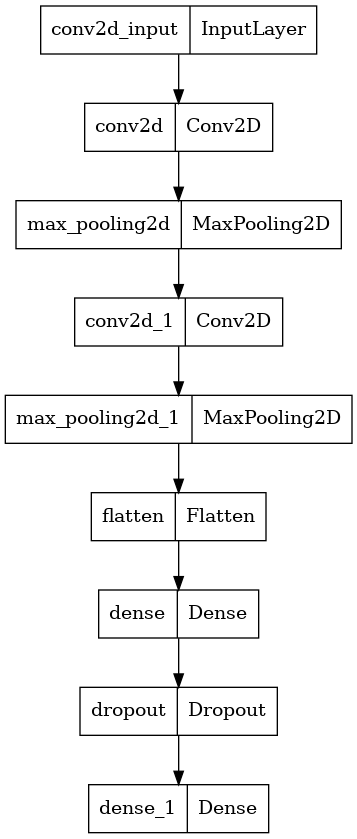

- 위 코드 실행 안되면
- !pip install graphviz

In [12]:
# 파일로 저장
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


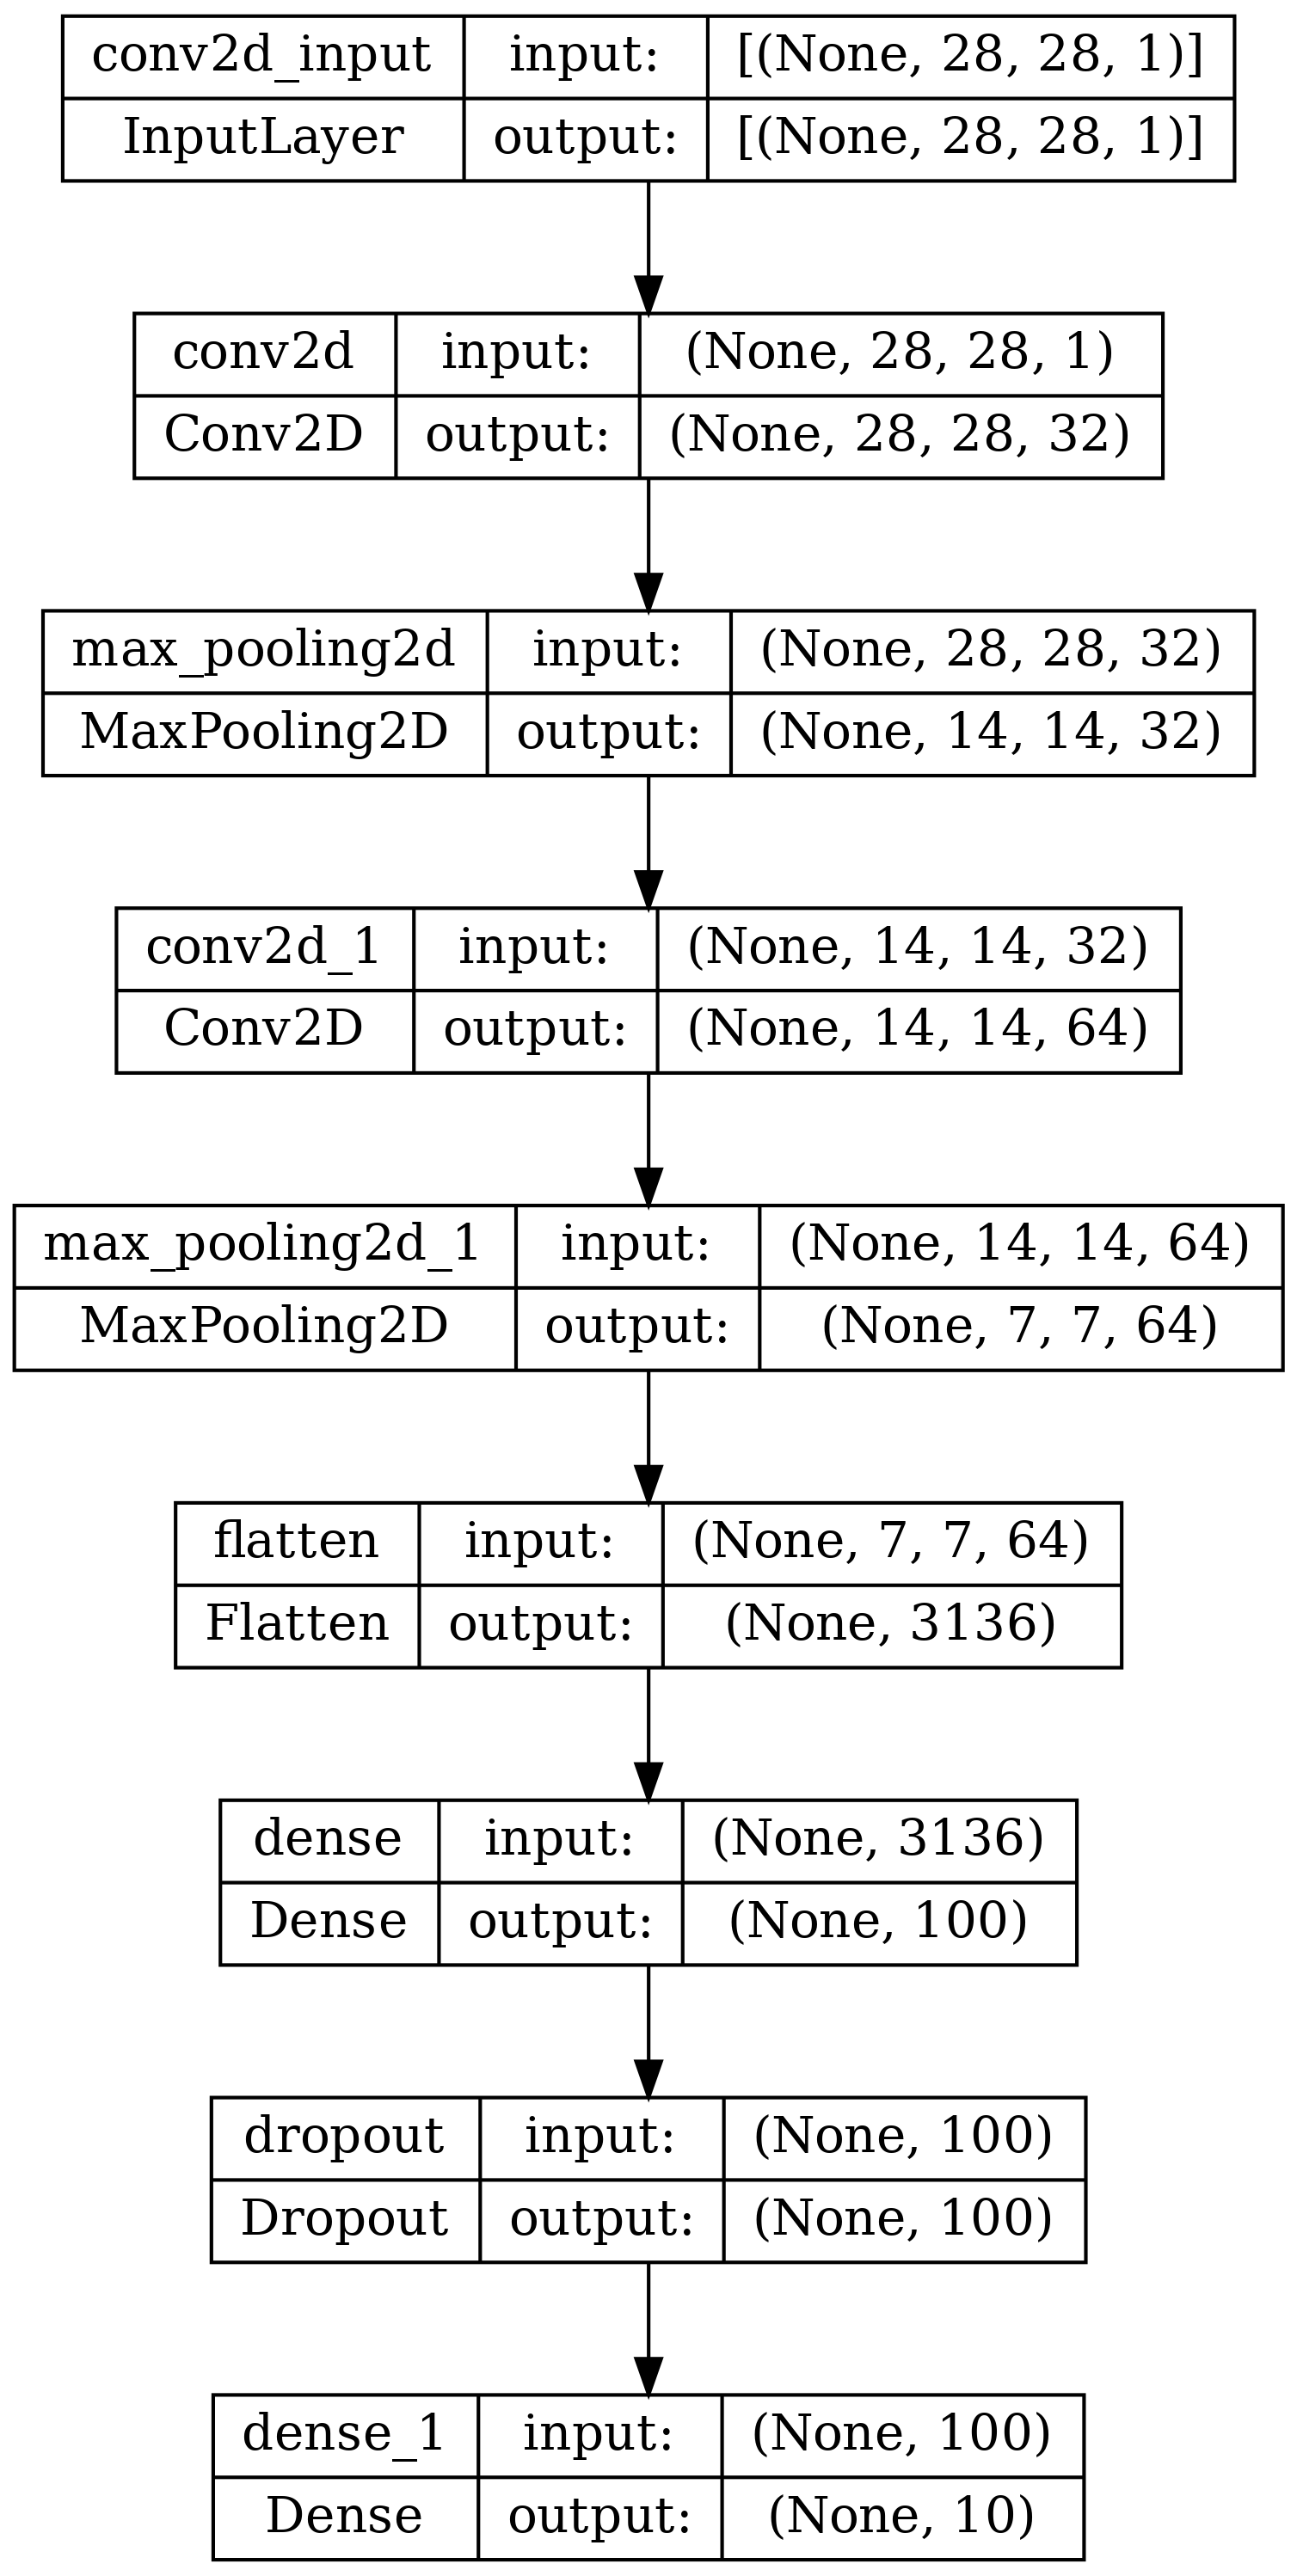

- 맨 처음 InputLayer 클래스는 케라스가 자동으로 추가해 준 입력층

## 모델 컴파일과 훈련

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')

In [14]:
cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_cb = keras.callbacks.EarlyStopping(patience=2,
                                        restore_best_weights=True)

In [15]:
train_target

array([7, 3, 5, ..., 6, 6, 1], dtype=uint8)

In [16]:
history = model.fit(train_scaled, train_target, epochs=20,
                  validation_data=(val_scaled, val_target),
                  callbacks=[cb, early_cb])

Epoch 1/20
1500/1500 [==============================] - 9s 3ms/step - loss: 0.5290 - accuracy: 0.8080 - val_loss: 0.3324 - val_accuracy: 0.8802
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3530 - accuracy: 0.8740 - val_loss: 0.2760 - val_accuracy: 0.8957
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3015 - accuracy: 0.8900 - val_loss: 0.2688 - val_accuracy: 0.8998
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2701 - accuracy: 0.9019 - val_loss: 0.2373 - val_accuracy: 0.9117
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2445 - accuracy: 0.9107 - val_loss: 0.2639 - val_accuracy: 0.9033
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2247 - accuracy: 0.9166 - val_loss: 0.2287 - val_accuracy: 0.9139
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2078 - accuracy: 0.9227 - val_loss: 0.2216 - val_accuracy:

### 결과 시각화

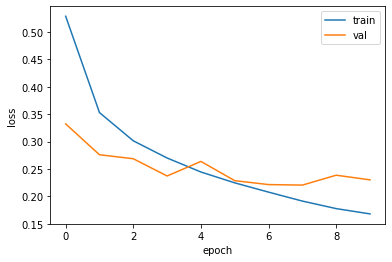

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 6번째(5번)에포크에서 손실 최저를 찍고 다시 증가하고 있는것을 볼 수 있음
    - 최적 에포크는 6번

In [18]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2206 - accuracy: 0.9202


[0.22063767910003662, 0.9202499985694885]

In [19]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2413 - accuracy: 0.9143


[0.24125047028064728, 0.9143000245094299]

- 테스트 데이터를 활용한 모델 성능 평가 : 91 퍼센트의 정확도가 나옴

### predict() 이용 예측 진행 해 봄

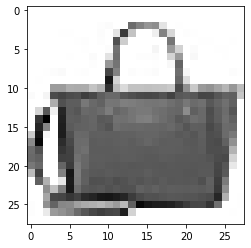

In [20]:
# 검증 첫번째 이미지 출력 - 핸드백 같음
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [21]:
preds = model.predict(val_scaled[0:1])

# 레벨에 대한 확률 반환
print(preds)  

1/1 [==============================] - 0s 121ms/step
[[2.1119507e-15 3.3668113e-23 6.1985439e-22 5.3141010e-16 5.1383302e-19
  3.0149025e-18 3.9666166e-17 1.1701908e-20 1.0000000e+00 9.7244581e-20]]


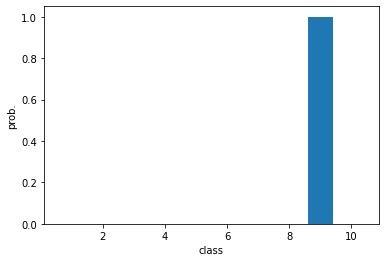

In [22]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()
# class를 0번부터 시작하지 않고 1번부터 시작했음
# 9번으로 결정됨

In [23]:
import numpy as np
np.argmax(preds)

8

In [24]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

print(classes[np.argmax(preds)])

가방


### test 데이터로 최종 확인

In [25]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [26]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2413 - accuracy: 0.9143


[0.24125047028064728, 0.9143000245094299]

- 최종 테스트 정확도 : 91.4%